In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/germancredit_merged.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


In [4]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,996,40,male,3,own,little,little,3857,30,car,0
997,997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,998,23,male,2,free,little,little,1845,45,radio/TV,1


In [5]:
df = df.drop('Unnamed: 0',axis=1)



In [6]:
pd.options.display.max_rows = 100


In [7]:
df.columns



Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'default'],
      dtype='object')

In [8]:
[col.lower().replace(' ','_') for col in df.columns]

['age',
 'sex',
 'job',
 'housing',
 'saving_accounts',
 'checking_account',
 'credit_amount',
 'duration',
 'purpose',
 'default']

In [9]:
df.columns = ['age', 'sex', 'job', 'housing', 'saving_accounts', 'checking_account',
       'credit_amount', 'duration', 'purpose', 'default']

In [10]:
df.columns = [col.lower().replace(' ','_') for col in df.columns]

In [11]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [12]:
df['default'].sum()

300

In [13]:
len(df)

1000

In [14]:
df['default'].sum() / len(df)

0.3

In [15]:
df['default'].mean()

0.3

In [16]:
[1,0,0,1,0]

[1, 0, 0, 1, 0]

In [17]:
(1 + 0 + 0 + 1 + 0) / 5

0.4

In [18]:
pd.np.mean([1,0,0,1,0])

0.4

In [19]:
df['default'].mean()

0.3

In [20]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [21]:
df['checking_account'].value_counts()

little      274
moderate    269
rich         63
Name: checking_account, dtype: int64

In [22]:
df['checking_account'].fillna('no_info',inplace=True)

In [23]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [24]:
df['checking_account'].value_counts()

no_info     394
little      274
moderate    269
rich         63
Name: checking_account, dtype: int64

In [25]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [26]:
df.pivot_table(index='checking_account',columns='sex',values='default',aggfunc=['count','mean'])

count           mean          
sex              female male    female      male
checking_account                                
little               88  186  0.522727  0.478495
moderate             86  183  0.476744  0.349727
no_info             116  278  0.155172  0.100719
rich                 20   43  0.200000  0.232558

In [27]:
df.groupby(['checking_account','sex'])['default'].agg(['count','mean'])

count      mean
checking_account sex                    
little           female     88  0.522727
                 male      186  0.478495
moderate         female     86  0.476744
                 male      183  0.349727
no_info          female    116  0.155172
                 male      278  0.100719
rich             female     20  0.200000
                 male       43  0.232558

In [28]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [29]:
df['credit_amount'].mean()

3271.258

In [30]:
t = pd.DataFrame({'salary':[50,70,30,60,100,10]})

In [31]:
t.mean()

salary    53.333333
dtype: float64

In [32]:
t.sort_values('salary')

,salary
5,10
2,30
0,50
3,60
1,70
4,100


In [33]:
t.median()

salary    55.0
dtype: float64

In [34]:
t = pd.DataFrame({'salary':[50,70,30,60,50,9999999999]})

In [35]:
t.mean()

salary    1.666667e+09
dtype: float64

In [36]:
t.median()

salary    55.0
dtype: float64

In [37]:
df['credit_amount'].mean()

3271.258

In [38]:
df['credit_amount'].median()

2319.5

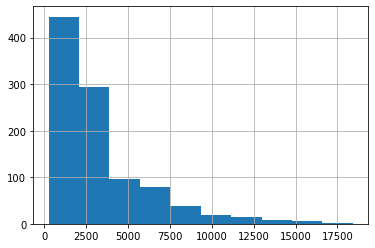

In [39]:
# i see skewed dist
df['credit_amount'].hist()

In [40]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,no_info,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [41]:
pd.np.inf > 9999999999999999

True

In [42]:
df['amount_group'] = pd.cut(df['credit_amount'],[0,1000,2000,3000,5000,pd.np.inf])

In [43]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,amount_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(1000.0, 2000.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(5000.0, inf]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(2000.0, 3000.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(5000.0, inf]"
4,53,male,2,free,little,little,4870,24,car,1,"(3000.0, 5000.0]"


In [44]:
df.groupby('amount_group')['default'].agg(['count','mean'])

,count,mean
amount_group,,
"(0.0, 1000.0]",116,0.318966
"(1000.0, 2000.0]",316,0.265823
"(2000.0, 3000.0]",188,0.239362
"(3000.0, 5000.0]",192,0.291667
"(5000.0, inf]",188,0.414894


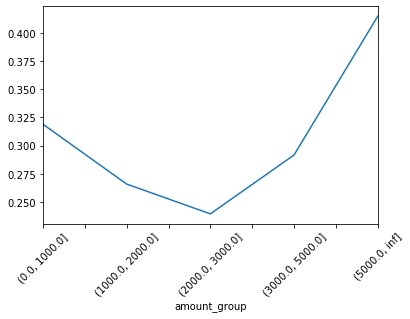

In [45]:
df.groupby('amount_group')['default'].mean().plot(rot=45)

# higher rate for big amount

In [46]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default,amount_group
0,67,male,2,own,NaN,little,1169,6,radio/TV,0,"(1000.0, 2000.0]"
1,22,female,2,own,little,moderate,5951,48,radio/TV,1,"(5000.0, inf]"
2,49,male,1,own,little,no_info,2096,12,education,0,"(2000.0, 3000.0]"
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,"(5000.0, inf]"
4,53,male,2,free,little,little,4870,24,car,1,"(3000.0, 5000.0]"


In [47]:
t = pd.DataFrame({'x':range(-100,100)})

In [48]:
t['y'] = t['x'] ** 2

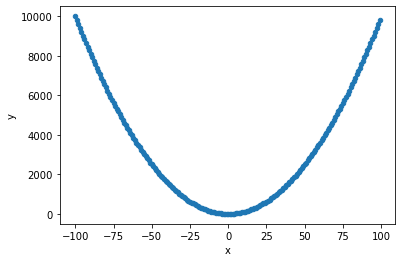

In [49]:
t.plot(kind='scatter',x='x',y='y')

In [50]:
t.corr()

,x,y
x,1.000000,-0.019362
y,-0.019362,1.000000


In [51]:
df[['age','credit_amount']].corr()

,age,credit_amount
age,1.000000,0.032716
credit_amount,0.032716,1.000000


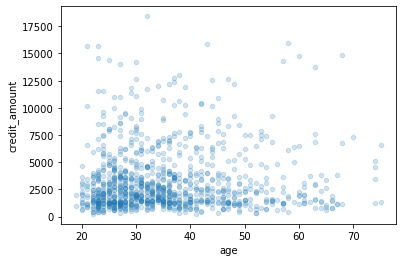

In [52]:
df.plot(kind='scatter',x='age',y='credit_amount',alpha=0.2)

In [53]:
df['age_group'] = pd.cut(df['age'],5)

In [54]:
df.groupby('age_group')['credit_amount'].agg(['count','mean','median'])

,count,mean,median
age_group,,,
"(18.944, 30.2]",411,3174.428224,2221.0
"(30.2, 41.4]",332,3270.783133,2401.5
"(41.4, 52.6]",161,3423.515528,2348.0
"(52.6, 63.8]",68,3616.264706,2128.5
"(63.8, 75.0]",28,2984.857143,1503.0


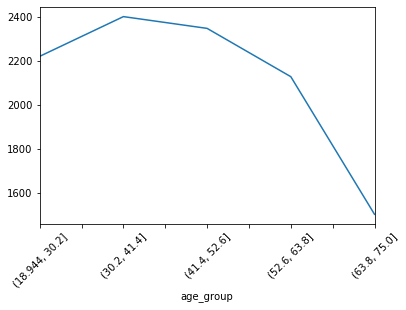

In [55]:
df.groupby('age_group')['credit_amount'].median().plot(rot=45)

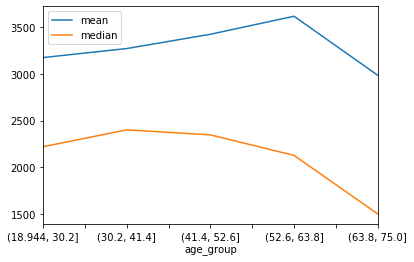

In [56]:
df.groupby('age_group')['credit_amount'].agg(['mean','median']).plot()

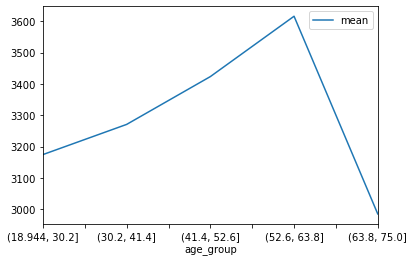

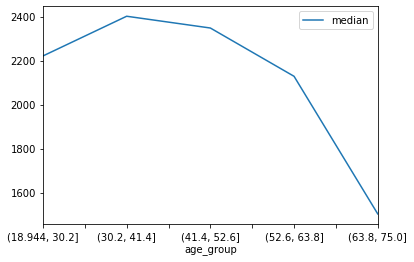

In [57]:
df.groupby('age_group')['credit_amount'].agg(['mean']).plot()
df.groupby('age_group')['credit_amount'].agg(['median']).plot()

In [58]:
t = df.groupby('age_group')['credit_amount'].agg(['count','mean','median'])

In [59]:
t = t.reset_index()

In [60]:
t.dtypes

age_group    category
count           int64
mean          float64
median        float64
dtype: object

In [61]:
t['age_group'] = t['age_group'].apply(lambda x: x.right).astype(float)

In [62]:
t[['age_group','median']].corr()

,age_group,median
age_group,1.000000,-0.747875
median,-0.747875,1.000000


In [63]:
df.groupby('age_group')[['credit_amount','default']].agg(['count','mean','median'])

credit_amount                      default                 
                       count         mean  median   count      mean median
age_group                                                                 
(18.944, 30.2]           411  3174.428224  2221.0     411  0.360097      0
(30.2, 41.4]             332  3270.783133  2401.5     332  0.253012      0
(41.4, 52.6]             161  3423.515528  2348.0     161  0.242236      0
(52.6, 63.8]              68  3616.264706  2128.5      68  0.338235      0
(63.8, 75.0]              28  2984.857143  1503.0      28  0.214286      0